# Data Applications Project by Skye Perkofski and Greg Hernandez

Dataset of Interest - [Daily Food & Nutrition Dataset](https://www.kaggle.com/datasets/adilshamim8/daily-food-and-nutrition-dataset)

The dataset containes synthetically generated dietary records to simulate real-world food data intake. It includes food categories, meal types, and nutritional values, like calories, proteins, sugars, etc, based on general nutritional guidelines and publicly available food databases. Each row in the dataset represents a food item along with its corresponding nutritional values.

**Our dataset problem is to make a model that can accurately predict a food's category type based on the food macros**

*Import libraries*

In [35]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

**Import/Read Data**

In [38]:
df = pd.read_csv('data/daily_food_nutrition_dataset.csv')
df.head()

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,2024-09-11,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,2024-08-27,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,2024-07-28,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471


**Drop any rows with missing values (if any exist) and remove duplicate rows (if any) and double checking there's no value issues**

In [41]:
df = df.dropna()
df = df.drop_duplicates()
print(df.isnull().sum())

Date                 0
User_ID              0
Food_Item            0
Category             0
Calories (kcal)      0
Protein (g)          0
Carbohydrates (g)    0
Fat (g)              0
Fiber (g)            0
Sugars (g)           0
Sodium (mg)          0
Cholesterol (mg)     0
Meal_Type            0
Water_Intake (ml)    0
dtype: int64


**Drop all unneccesary columns**

In [44]:
df_clean = df.drop(columns=['Date', 'User_ID', 'Meal_Type', 'Food_Item','Water_Intake (ml)'])
df_clean.head(5)

,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg)
0,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125
1,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97
2,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157
3,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13
4,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148


**Plot number of items per Category type - Done to make sure all categories are equal and won't skew results**

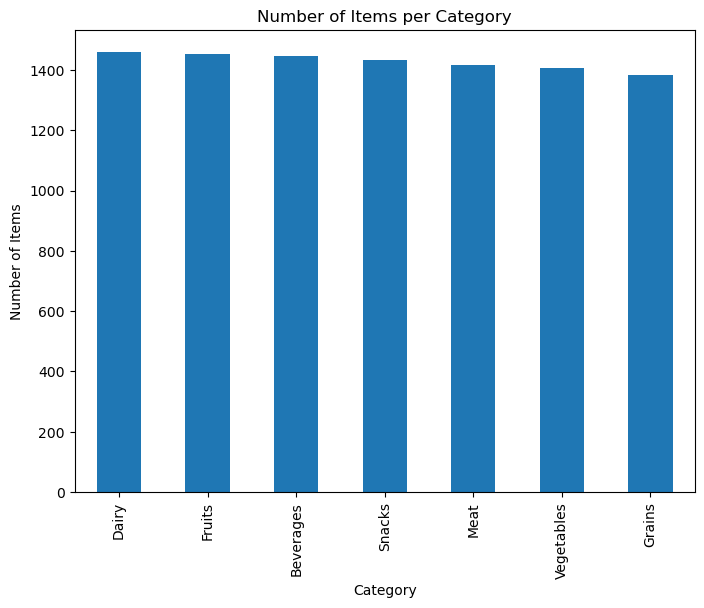

In [47]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')

plt.title('Number of Items per Category')
plt.xlabel('Category')
plt.ylabel('Number of Items')
plt.xticks(rotation=90)
plt.show() # Thankfully all Category labels are relatively equal so no one label should skew the results

**Determine number of Categories labels and Category label names as well as reassigned each label to an integer 0-6**

In [50]:
df.Category.unique()

array(['Meat', 'Fruits', 'Grains', 'Vegetables', 'Snacks', 'Beverages',
       'Dairy'], dtype=object)

In [52]:
category_mapping = {
    'Meat': 0,
    'Fruits': 1,
    'Grains': 2,
    'Vegetables': 3,
    'Snacks': 4,
    'Beverages': 5,
    'Dairy': 6
}

df_clean['Category'] = df_clean['Category'].map(category_mapping)

df_clean.head()

,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg)
0,0,173,42.4,83.7,1.5,1.5,12.7,752,125
1,1,66,39.2,13.8,3.2,2.6,12.2,680,97
2,0,226,27.1,79.1,25.8,3.2,44.7,295,157
3,1,116,43.4,47.1,16.1,6.5,44.1,307,13
4,1,500,33.9,75.8,47.0,7.8,19.4,358,148


**Determine shape - number of columns and rows working with**

In [55]:
df_clean.shape

(10000, 9)

**Plot correlation through a confusion matrix - To check if the data is dependent on the independent value**

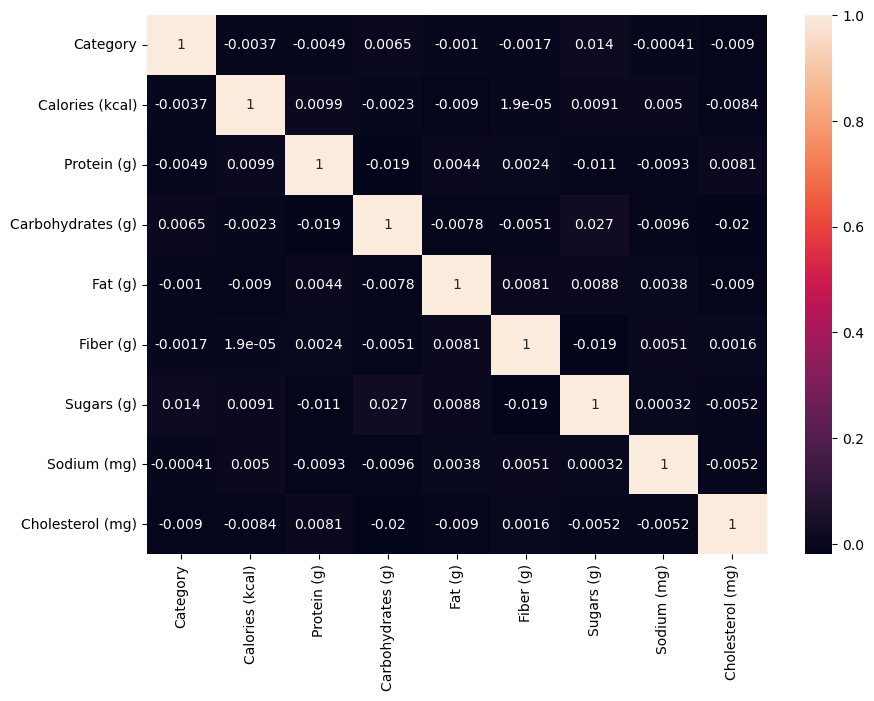

In [58]:
import seaborn as sn

plt.figure(figsize=(10, 7))
dataplot = sn.heatmap(df_clean.corr(),annot=True)
  
plt.show() # unfortunately this shows very little correlation in our data which forewarns to the low accuracy

**Plot basic macro to Category**

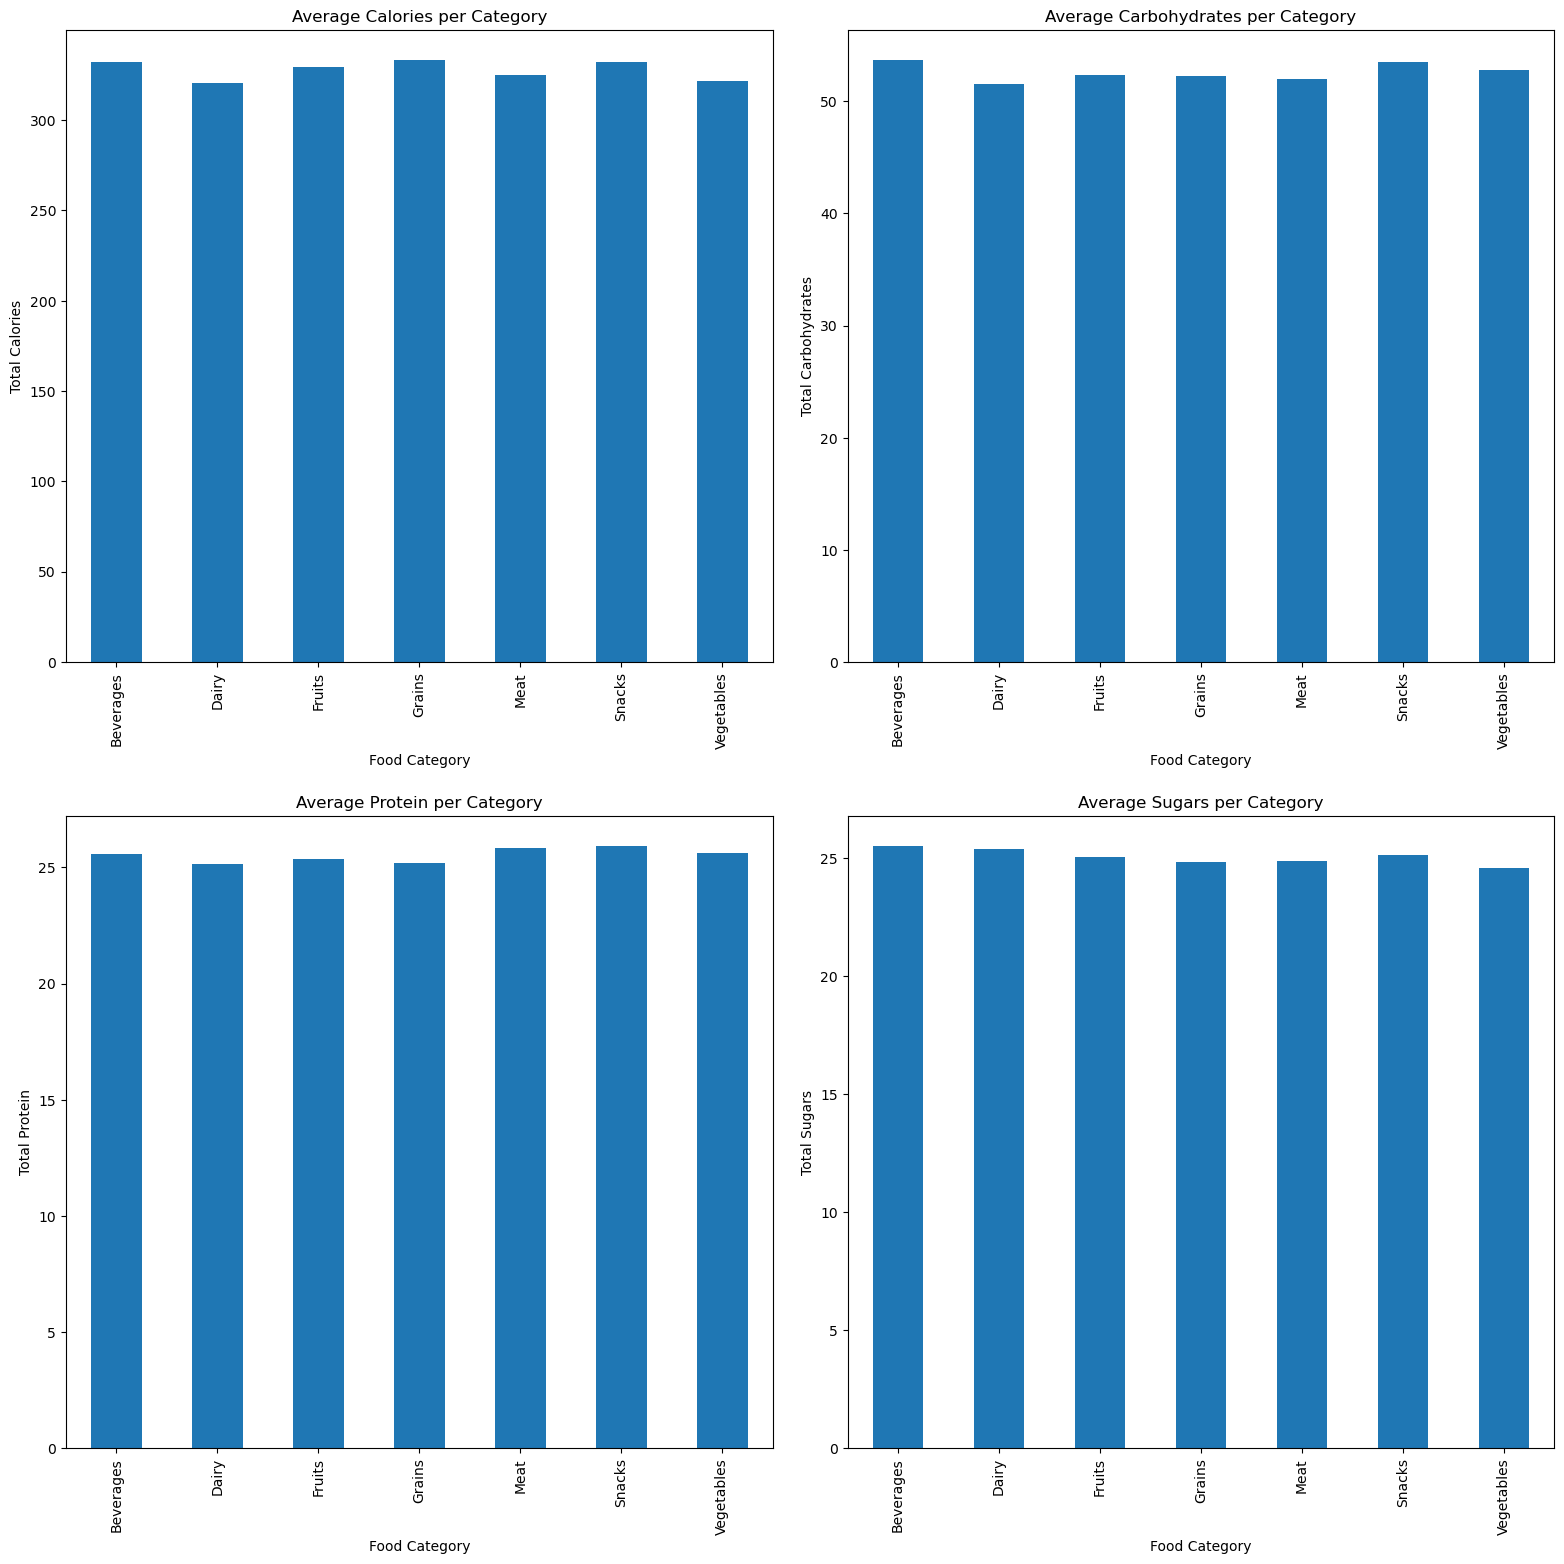

In [66]:
fig = plt.figure(figsize = [16,16])

plt.subplot(2,2,1)
df_cal = df.groupby('Category')['Calories (kcal)'].mean()
df_cal.plot(kind='bar')
plt.title("Average Calories per Category")
plt.xlabel("Food Category")
plt.ylabel("Total Calories") # Basic Macro Comparison

plt.subplot(2,2,2)
df_carb = df.groupby('Category')['Carbohydrates (g)'].mean()
df_carb.plot(kind='bar')
plt.title("Average Carbohydrates per Category")
plt.xlabel("Food Category")
plt.ylabel("Total Carbohydrates") # Highest Macro Correlation

plt.subplot(2,2,3)
df_protein = df.groupby('Category')['Protein (g)'].mean()
df_protein.plot(kind='bar')
plt.title("Average Protein per Category")
plt.xlabel("Food Category")
plt.ylabel("Total Protein") # Lowest Macro Correlation

plt.subplot(2,2,4)
df_sugar = df.groupby('Category')['Sugars (g)'].mean()
df_sugar.plot(kind='bar')
plt.title("Average Sugars per Category")
plt.xlabel("Food Category")
plt.ylabel("Total Sugars") # Second Highest Macro Correlation

plt.tight_layout(pad=2)
plt.show()

**Scatterplot further correlation**

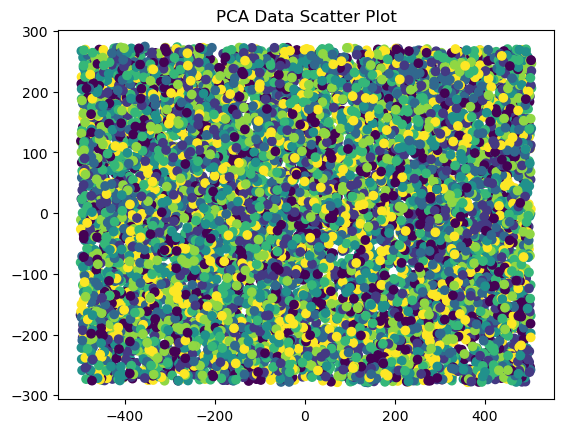

In [63]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df_clean)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df_clean['Category'])
plt.title('PCA Data Scatter Plot')
plt.show() # Unfortunately this does further prove the data is not well distinguishable

**Further clean data by removing Category column and only leave macros for training/testing**

In [69]:
data = df_clean.drop(columns=['Category'])

**Set the variables based off the cleaned data and necessary Category columns**

In [72]:
X = data
y = df_clean['Category']

**Split the dataset into training and test sets (80/20 split)**

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

**Scale the features using StandardScaler**

In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train the model**

In [81]:
model = LogisticRegression(random_state=0, max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=0)

 **Make predictions on the test set**

In [84]:
y_pred = model.predict(X_test_scaled)

**Show accuracy of model**

In [87]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.1515


**We have an accuracy score of 15%, this means our model did not do too well**

**We make a confusion matrix to understand what was predicted accurately**

In [91]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[12 71  9 77 48 36 40]
 [11 72  7 63 57 34 36]
 [12 77 12 56 50 39 35]
 [16 71  4 55 41 41 39]
 [13 73  6 63 55 38 32]
 [15 81  4 70 55 37 34]
 [18 78  2 67 41 37 60]]


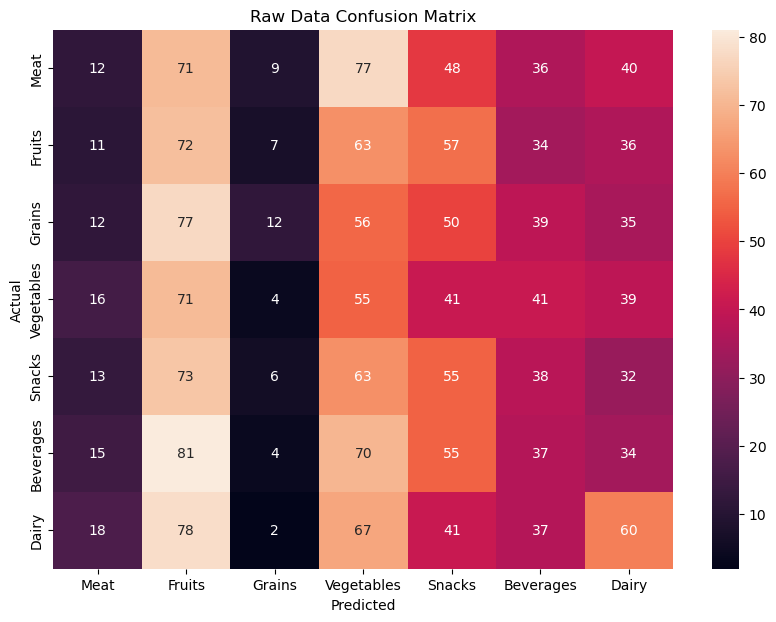

In [93]:
labels = df['Category'].unique()
conf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(conf_matrix, index = [i for i in labels], columns = [i for i in labels])

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Raw Data Confusion Matrix')
plt.show() # This shows the raw data numbers for how it exactly predicted each category

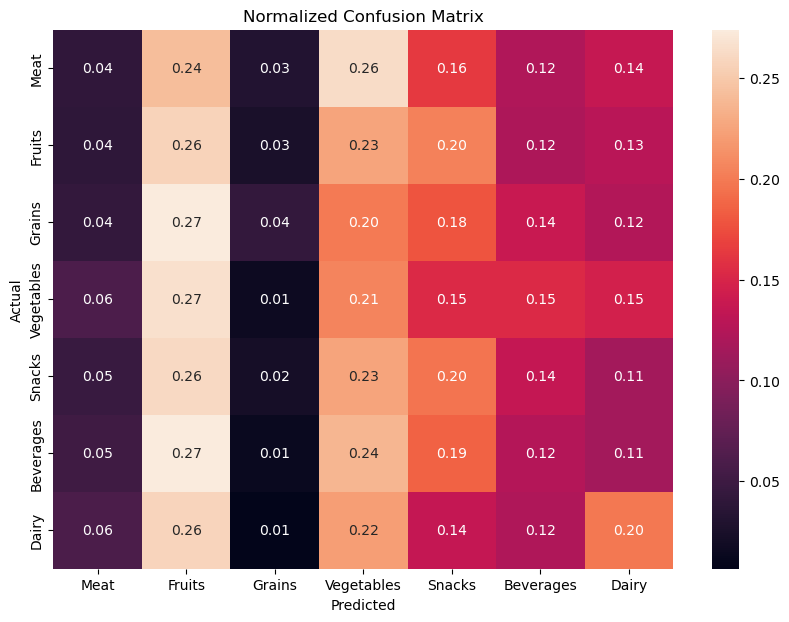

In [95]:
numClasses = 7
labels = df['Category'].unique()
conf = np.zeros([numClasses, numClasses])

for i in range(len(y_test)):
    real = y_test.iloc[i]
    guess = y_pred[i]
    conf[real, guess] += 1

rowsums = np.sum(conf, axis=1)
rowsums = np.reshape(rowsums, [numClasses, 1])
rowsums = np.repeat(rowsums, numClasses, axis=1)
conf = conf / rowsums
df_cm = pd.DataFrame(conf, index = [i for i in labels], columns = [i for i in labels])

plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True, fmt=".2f")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Normalized Confusion Matrix')
plt.show() # This shows the percentages of predicitions for each category

**Since our accuracy with Logistic Regression was so bad we tested KNN to see if there is a different result**

In [98]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn}")

Accuracy: 0.1555


**We also see a 15% accuracy which isn't any better than our other model**

**We even attempted Random Forest to see if its results were any different**

In [135]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.144


**We still see a low accuracy of 14%**

Over three different appraoches they all result with about the same accuracy of only 15%. We think this is due to the data itself as the serving size to show the specific data for said food is an unseen variable. For example Banana can be seen twice in the data but has different data assiocated with because of the size serving taken; one is labeled snack and the other as lunch. As well in general when thinking about food there naturally will be two different category foods with very similar macros.

**We also tried refining the orignal data so the meal type is the same - Lunch. It holds all 7 category labels but they're all under the same serving**

In [142]:
df_lunch = df[df['Meal_Type'].isin(['Lunch'])]
dfl = df_lunch.drop(columns=['Date', 'User_ID', 'Meal_Type', 'Food_Item','Water_Intake (ml)'])
dfl.shape

(2487, 9)

In [144]:
XX = dfl.drop(columns=['Category'])
YY = dfl['Category']

XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.2, random_state=123)

XX_train_scaled = scaler.fit_transform(XX_train)
XX_test_scaled = scaler.transform(XX_test)

model = LogisticRegression(random_state=0, max_iter=1000)
model.fit(XX_train_scaled, YY_train)

YY_pred = model.predict(XX_test_scaled)

accuracy = accuracy_score(YY_test, YY_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.1144578313253012


Unfortunately, the accuracy is even worse with only 11% which may be due to the lower amount of data as it's only roughly 2500 compared to the orignal 10000 its trained off of. 

**Since the accuracy was so low with all 7 category labels, we tried it with the top two highest count labels - Dairy and Fruits**

In [113]:
df16 = df_clean[df_clean['Category'].isin([1, 6])]
df16.shape

(2913, 9)

In [115]:
xx = df16.drop(columns=['Category'])
yy = df16['Category']

xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.2, random_state=123)

xx_train_scaled = scaler.fit_transform(xx_train)
xx_test_scaled = scaler.transform(xx_test)

xx_train_scaled = scaler.fit_transform(xx_train)
xx_test_scaled = scaler.transform(xx_test)

model = LogisticRegression(random_state=0, max_iter=1000)
model.fit(xx_train_scaled, yy_train)

yy_pred = model.predict(xx_test_scaled)

accuracy = accuracy_score(yy_test, yy_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5025728987993139


This does result in a higher accuracy of 50% when it has only 2 options to predict instead of 7, but it still is not the greatest prediction accuracy

**Overall even with further data refinement/analysis it proves the low accruacy is due to the dataset itself**